## <h1 align="center">Make your first prediction with Linear Regression</h1>

## Explainer Video

In [2]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/284676954" width="800" height="600" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>')

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Linear Regression in `sklearn`
***

**`sklearn`** provides an easy api to fit a linear regression and predict values using linear regression

Let's see how it works

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset
***

Let's start by loading the dataset. We'll be using two `.csv` files. One having only one predictor and the other having multiple predictors. Since the target variable(we'll find out what target variables and predictors are below) is **quantitative/continuous**, this is the best for regression problems. 

Let's start loading the data for univariate analysis.

In [2]:
# We have loaded the dataset for Mini Challenges below in the variable 'df' 
# Sales is the target variable and the rest are predictors 

#Import data
df = pd.read_csv('../data/Advertising.csv', index_col=0)
# df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
df.shape

(200, 4)

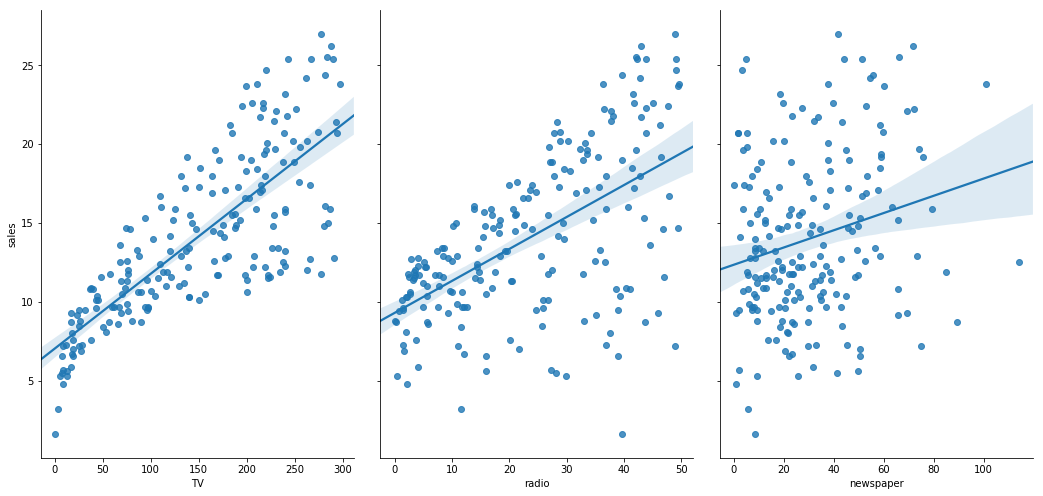

In [8]:
sns.pairplot(df, x_vars = ['TV','radio','newspaper'], y_vars = 'sales', size= 7, aspect=0.7, kind='reg')

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
### Instructions

* Find the relationship between the predictor and target variables by plotting a scatter plot

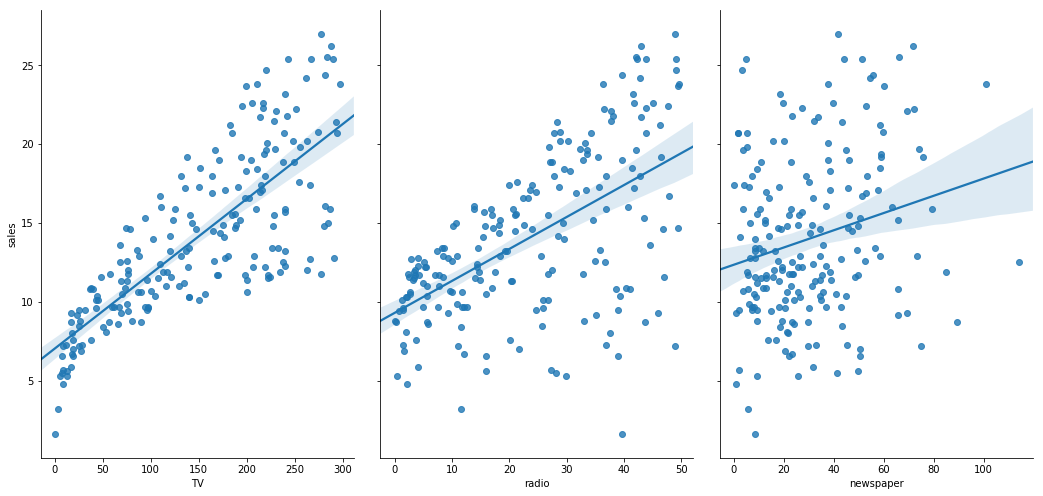

In [9]:
sns.pairplot(df, x_vars = ['TV','radio','newspaper'], y_vars = 'sales', size= 7, aspect=0.7, kind='reg')

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
### Instructions

* Slice the predictors and target into variables X and y respectively 

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
### Instructions

* Split the dataframe into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3` and `random_state = 6`

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 6 )


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
### Instructions

* Fit a linear regression model on the training data X_train and y_train.

In [12]:
# import packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin1 = LinearRegression()
lin1.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
### Instructions
* Find the intercept and coefficients for the model fitted above.

In [13]:
#To retrieve the intercept:
print(lin1.intercept_)
#For retrieving the slope:
print(lin1.coef_)

2.9379108620031893
[0.04629491 0.18350797 0.00364187]


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 6
***
### Instructions
* Predict on the variable `X_test` and create a DataFrame of the actual values and predicted values and find the mean squared error

In [14]:
from sklearn.metrics import mean_squared_error
# Predicting on the sample subset 
lin1_pre1 = lin1.predict(X_test)
X_test['predicted values'] = lin1_pre1
print(np.shape(lin1_pre1))
print(X_test)
# Calculating error

print('Mean Squared Error is',mean_squared_error(y_test, lin1_pre1))

(60,)
        TV  radio  newspaper  predicted values
119  125.7   36.9       79.2         15.817061
12   214.7   24.0        4.0         17.296187
150   44.7   25.8       20.6          9.816821
153  197.6   23.3       14.2         16.413236
146  140.3    1.9        9.0          9.814529
135   36.9   38.6       65.6         11.968507
94   250.9   36.5       72.3         21.514652
20   147.3   23.9       19.1         14.212551
5    180.8   10.8       58.4         13.502602
7     57.5   32.8       23.5         11.704514
152  121.0    8.4       48.7         10.258421
95   107.4   14.0       10.9         10.518792
31   292.9   28.3       43.2         21.848295
82   239.8    4.1       36.9         14.926198
157   93.9   43.5       50.5         15.451514
116   75.1   35.0       52.7         13.029364
89    88.3   25.5       73.4         11.972518
109   13.1    0.4       25.6          3.711009
159   11.7   36.9       45.2         10.415618
14    97.5    7.6        7.2          8.872547
13    2

In [15]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': lin1_pre1})
df4.head(25)

,Actual,Predicted
119,15.9,15.817061
12,17.4,17.296187
150,10.1,9.816821
153,16.6,16.413236
146,10.3,9.814529
135,10.8,11.968507
94,22.2,21.514652
20,14.6,14.212551
5,12.9,13.502602
7,11.8,11.704514


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 7
***
### Instructions
* Find the Mean Absolute Error , Root Mean Squared Error and $R^2$ Score

In [16]:
from sklearn.metrics import r2_score
# Calculating error

print('Mean Squared Error is',mean_squared_error(y_test, lin1_pre1))

# R-Square

print('R Square Score is ', r2_score(y_test, lin1_pre1))

Mean Squared Error is 2.9106113713179598
R Square Score is  0.8598585513768164


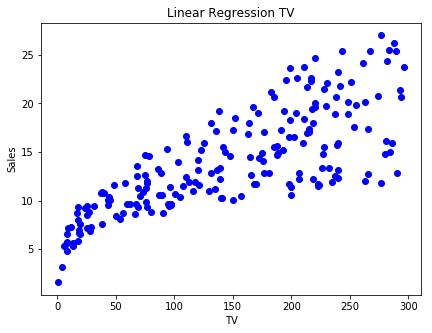

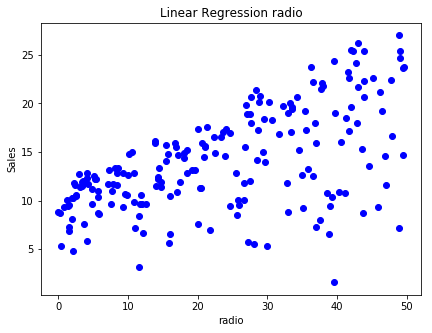

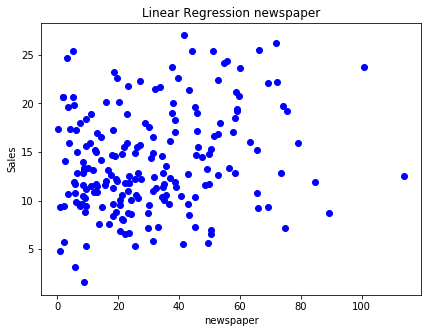

In [20]:
col = list(df.columns)
cols=col[0:-1]
for i in range(0,len(cols)):
    if len(cols) > i:
        X = df.iloc[:, i:i+1]
        y = df.iloc[:, -1]
        
        
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.scatter(X, y, color = 'blue') 
        plt.title('Linear Regression '+str(cols[i]) )
        plt.xlabel(cols[i]) 
        plt.ylabel('Sales')  

        plt.show()
    

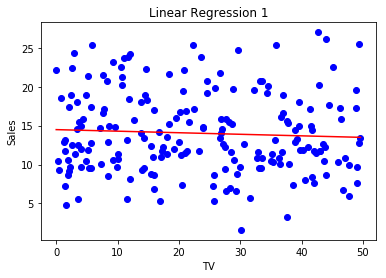

In [21]:
# import packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df.iloc[:, 1:2]
y = df.iloc[:, -1]

X = np.sort(X, axis=0)
lin1 = LinearRegression()
lin1.fit(X,y)
lin1_pre = lin1.predict(X)

poly = PolynomialFeatures(degree = 15)
X_poly = poly.fit_transform(X)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin1_pre, color = 'red') 
plt.title('Linear Regression 1') 
plt.xlabel('TV') 
plt.ylabel('Sales')   
plt.show()

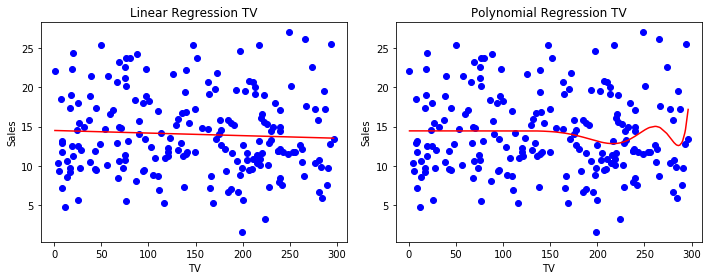

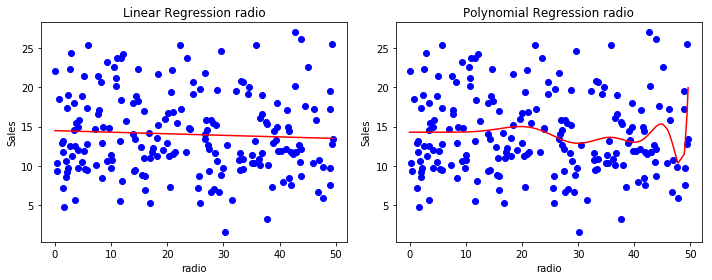

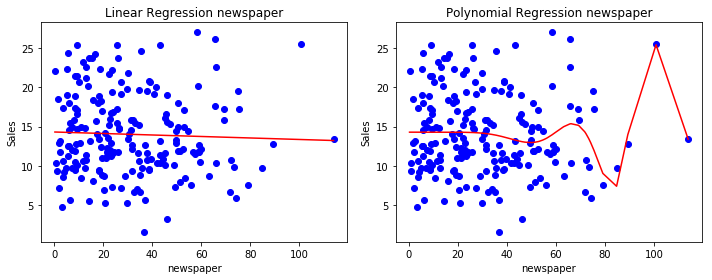

In [22]:
# import packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
for i in range(0,len(cols)):
    if len(cols) > i:
        X = df.iloc[:, i:i+1]
        y = df.iloc[:, -1]
        X = np.sort(X, axis=0)
        lin1 = LinearRegression()
        lin1.fit(X,y)
        lin1_pre1 = lin1.predict(X)
        poly = PolynomialFeatures(degree = 15)
        X_poly = poly.fit_transform(X)
        lin2 = LinearRegression()
        lin2.fit(X_poly, y)
        lin2_pre2 = lin2.predict(X_poly)
        
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.scatter(X, y, color = 'blue') 
        plt.plot(X, lin1_pre1, color = 'red') 
        plt.title('Linear Regression '+str(cols[i]) )
        plt.xlabel(cols[i]) 
        plt.ylabel('Sales')  

        plt.subplot(122)
        plt.scatter(X, y, color = 'blue') 
        plt.plot(X, lin2_pre2, color = 'red') 
        plt.title('Polynomial Regression '+str(cols[i]) )
        plt.xlabel(cols[i]) 
        plt.ylabel('Sales')  
        plt.tight_layout()
        
        plt.show()
    

## Quiz

Q1. True-False: Linear Regression is a supervised machine learning algorithm.
```python
A) TRUE
B) FALSE

```
Q2. True-False: Linear Regression is mainly used for Regression.
```python
A) TRUE
B) FALSE

```
Q4. Which of the following methods do we use to find the best fit line for data in Linear Regression?
```python
A) Least Square Error
B) Maximum Likelihood
C) Logarithmic Loss
D) Both A and B

```
Q5. Which of the following evaluation metrics can be used to evaluate a model while modeling a continuous output variable?
```python
A) AUC-ROC
B) Accuracy
C) Logloss
D) Mean-Squared-Error

```

# Thank You
***

### Next Session: - 
- Initial Exploration
- Introduction to Seaborn
- Univariate Analysis
- Multi-variate Analysis

For more queries - Reach out to academics@greyatom.com 